[Fish Market](https://www.kaggle.com/aungpyaeap/fish-market)

**Goal:** Predict the height of fishes

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Data Exploration

In [2]:
fish = pd.read_csv('Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


## Modifications/Cleaning

Don't need to do too much since this dataset is alread clean. Just need to convert numeric values from string to float.

In [5]:
fish['Weight'] = pd.to_numeric(fish['Weight'],errors='coerce')
fish['Length1'] = pd.to_numeric(fish['Length1'],errors='coerce')
fish['Length2'] = pd.to_numeric(fish['Length2'],errors='coerce')
fish['Length3'] = pd.to_numeric(fish['Length3'],errors='coerce')
fish['Height'] = pd.to_numeric(fish['Weight'],errors='coerce')
fish['Width'] = pd.to_numeric(fish['Weight'],errors='coerce')
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Visualizations

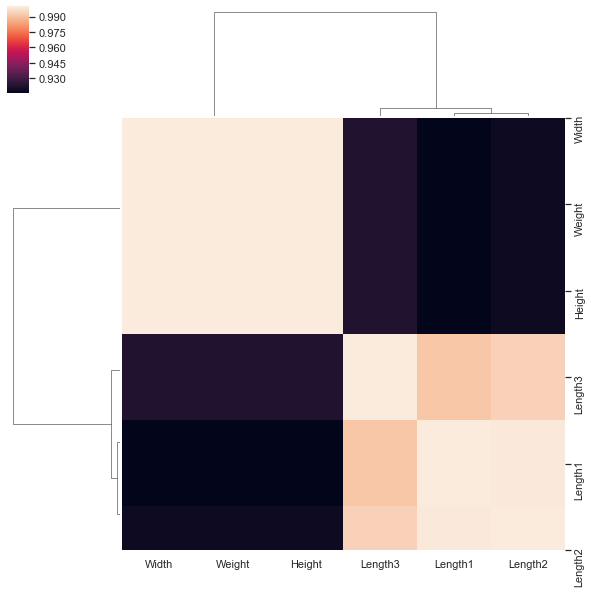

In [6]:
sns.clustermap(fish.corr())

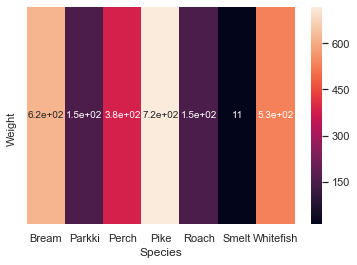

In [7]:
sns.heatmap(fish.pivot_table(values='Weight',columns='Species'),annot=True)

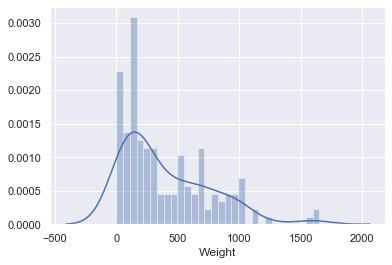

In [8]:
sns.distplot(fish['Weight'],bins=30,kde=True)

# Model Building

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = fish[['Length1','Length2','Length3','Height','Width']]
y = fish['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluations

In [13]:
# According to the R2. This model is probably a perfect predictor since there are few entries.
ln.score(X_test,y_test)

1.0

In [14]:
from sklearn import metrics

In [15]:
prediction = ln.predict(X_test)

In [16]:
print(f'MSE = {metrics.mean_squared_error(y_test,prediction)}')
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y_test,prediction))}')
print(f'R2 = {ln.score(X_test,y_test)}')
# very small MSE and RMSE, so there is very little variation between the estimated values and the actual values
# according to the R2, this model is a perfect predictor, but we know that's not true since the MSE is > 0

MSE = 6.49261121204707e-26
RMSE = 2.548060284225448e-13
R2 = 1.0


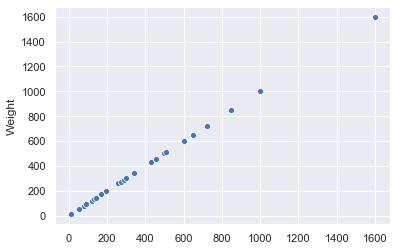

In [17]:
sns.scatterplot(x=prediction,y=y_test)

In [18]:
pd.DataFrame(ln.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
Length1,-1.274594e-13
Length2,1.004379e-13
Length3,-6.949089e-16
Height,5.000000e-01
Width,5.000000e-01


The lengths don't really seem to contribute much to the weight prediction. However, for both height and width, a unit increase in either one is correlated to a .5 increase in weight

In [19]:
import statsmodels.api as sm
model = sm.OLS(y,sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.454e+31
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:08:44   Log-Likelihood:                 4295.8
No. Observations:                 159   AIC:                            -8582.
Df Residuals:                     154   BIC:                            -8566.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.54e-13   1.69e-13     -1.500      0.1

/Users/kqmbui/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


As I thought. The lengths are not significant in predicting the weight of fishes since Length1, Length2, and Length3 all have a p-value > .05